In [43]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.patches import Circle, Arc

import os
import PIL
from PIL import Image, ImageFilter
from matplotlib import cm
from matplotlib.colors import Normalize

import matplotlib as mpl


In [44]:
clmap = plt.get_cmap("nipy_spectral")
def get_rgb_color(value, clmap):
    rgb = clmap(value)[:3]  # Get RGB values from the colormap
    rgb = [int(x * 255) for x in rgb]  # Scale RGB values to 0-255 range
    color_code = f"#{rgb[0]:02x}{rgb[1]:02x}{rgb[2]:02x}"  # Convert RGB values to hexadecimal string
    return color_code


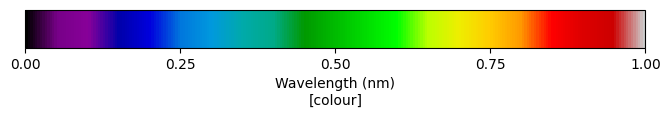

In [45]:
def test_colormap(cmap):

    # Create a figure and an axis for the colorbar
    fig, ax = plt.subplots(figsize=(8, 1))
    fig.subplots_adjust(bottom=0.5)
    
    # Create a horizontal colorbar
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
    
    # Set colorbar ticks and label
    cb.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
    cb.set_label("Wavelength (nm)\n[colour]")
    # cb.set_ticks([0.18,0.4,0.62,0.84])
    # cb.set_ticklabels([400,500,600,700])
    # cb.ax.set_xlim(0.15,0.85)
    
    # Show the plot
    plt.show()

# Example usage
test_colormap(clmap)



In [46]:
get_rgb_color(0.1, clmap)

'#870098'

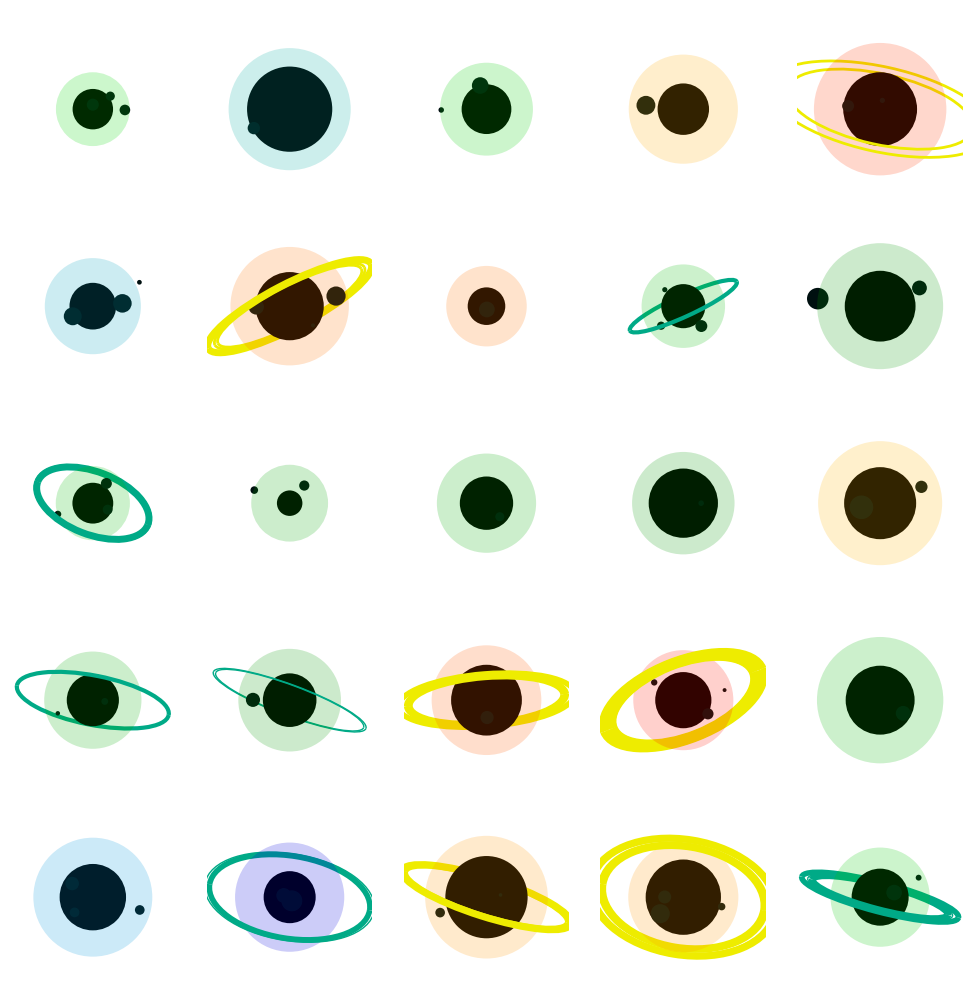

In [47]:


def generate_planet(ax, atmosphere_type):
    """
    Draws a cartoon planet with multiple rings that appear to go behind and in front of the planet.
    """
    # Set colors based on atmosphere type
    if atmosphere_type == "h2o":
        color = get_rgb_color(np.random.randint(20,38)/100, clmap)
        ring_color = get_rgb_color(0.40, clmap)
    elif atmosphere_type == "co2":
        color = get_rgb_color(np.random.randint(75,85)/100, clmap)
        ring_color = get_rgb_color(0.70, clmap)
    elif atmosphere_type == "ch4":
        color = get_rgb_color(np.random.randint(45,55)/100, clmap)
        ring_color = get_rgb_color(0.40, clmap)

    # Planet radius
    planet_radius = random.uniform(0.22, 0.4)
    atmosphere_depth = random.uniform(0.1, 0.18)
    
    # Draw multiple rings if applicable
    rings_bool = random.choice([True, False])
    if rings_bool:
        n_rings = random.randint(1, 5)  # Randomly select 1 to 3 rings
        ring_angle = random.uniform(-30, 30)  # Common angle for all rings
        ring_factor = random.uniform(0.1, 0.7)  # Factor to scale the ring size
        ring_top_bottom = random.choice([True, False])  

        ring_diameter_x = [0] * n_rings
        ring_width = [0] * n_rings
        ring_thickness = [0] * n_rings

        if ring_top_bottom:
            thet1 = 180
            thet2 = 360
        else:
            thet1 = 0
            thet2 = 180
        
        for i in range(n_rings):
            # Randomly vary the ring properties
            ring_diameter_x[i] = planet_radius * random.uniform(2.5, 3.5)  # Horizontal diameter
            ring_width[i] = ring_diameter_x[i]*ring_factor  #planet_radius * random.uniform(1.5, 2.0)       # Vertical diameter
            ring_thickness[i] = random.randint(1, 5)  # Thickness of the ring


            # Draw the back half of the ring
            ring_back = Arc(
                (0.5, 0.5),                # Center of the ellipse
                width=ring_diameter_x[i],      # Horizontal diameter
                height=ring_width[i],          # Vertical diameter
                angle=ring_angle,           # Tilt angle
                theta1=thet1, theta2=thet2,     # Back half of the ring (180°-360°)
                color=ring_color,
                lw=ring_thickness[i]
            )
            ax.add_artist(ring_back)

    # Draw the planet itself
    planet_circle = Circle((0.5, 0.5), planet_radius- atmosphere_depth, color='black', ec="none", lw=1)
    ax.add_artist(planet_circle)

    # Draw random spots (like clouds or storms)
    for _ in range(random.randint(1, 3)):
        spot_x = random.uniform(0.5-planet_radius, 0.5+planet_radius)
        spot_y = random.uniform(0.35, 0.65)
        spot_size = random.uniform(0.01, planet_radius*0.2)
        spot = Circle((spot_x, spot_y), spot_size, color="#001010", alpha=1, ec='none')
        ax.add_artist(spot)

    planet_surface = Circle((0.5, 0.5), planet_radius, color=color, ec="none", lw=1, alpha=0.2)
    ax.add_artist(planet_surface)

    # Draw the front half of each ring to complete the look
    if rings_bool:
        if ring_top_bottom:
            thet1 = 0
            thet2 = 180
        else:
            thet1 = 180
            thet2 = 360
        for i in range(n_rings):

            ring_front = Arc(
                (0.5, 0.5),                # Center of the ellipse
                width=ring_diameter_x[i],      # Horizontal diameter
                height=ring_width[i],          # Vertical diameter
                angle=ring_angle,           # Tilt angle
                theta1=thet1, theta2=thet2,       # Front half of the ring (0°-180°)
                color=ring_color,
                lw=ring_thickness[i]
            )
            ax.add_artist(ring_front)

    # Remove axes, set equal aspect, and set black background
    ax.set_facecolor("white")
    ax.set_aspect("equal")
    ax.axis("off")

def generate_planet_grid():
    """
    Generate a 5x5 grid of planets with different atmospheres.
    """
    fig, axs = plt.subplots(5, 5, figsize=(10, 10), facecolor="white")
    atmosphere_types = ['co2', 'h2o', 'ch4']

    for i in range(5):
        for j in range(5):
            atmosphere_type = random.choice(atmosphere_types)
            generate_planet(axs[i, j], atmosphere_type)
            axs[i, j].set_title(atmosphere_type, fontsize=8, color="white")

    plt.tight_layout()
    plt.show()

# Generate the grid
generate_planet_grid()


In [48]:

def save_planet_grid():
    """
    Generate 25 planets with different atmospheres, saving each as an individual PNG
    in folders named after the atmosphere type.
    """
    atmosphere_types = ['co2', 'h2o', 'ch4']
    
    # Ensure directories exist for each atmosphere type
    for atmosphere in atmosphere_types:
        os.makedirs(atmosphere, exist_ok=True)

    # Generate and save each planet
    for i in range(25):  # Generate a total of 25 planets
        atmosphere_type = random.choice(atmosphere_types)
        
        # Create a new figure and axis for each planet
        fig, ax = plt.subplots(figsize=(2, 2), facecolor="none")
        generate_planet(ax, atmosphere_type)
        
        # Save the figure in the corresponding folder
        filename = f"{atmosphere_type}/planet_{i+1}.png"
        plt.savefig(filename, dpi=100, bbox_inches='tight', facecolor="none")
        
        # Close the figure to free up memory
        plt.close(fig)

# Generate and save the planets
save_planet_grid()


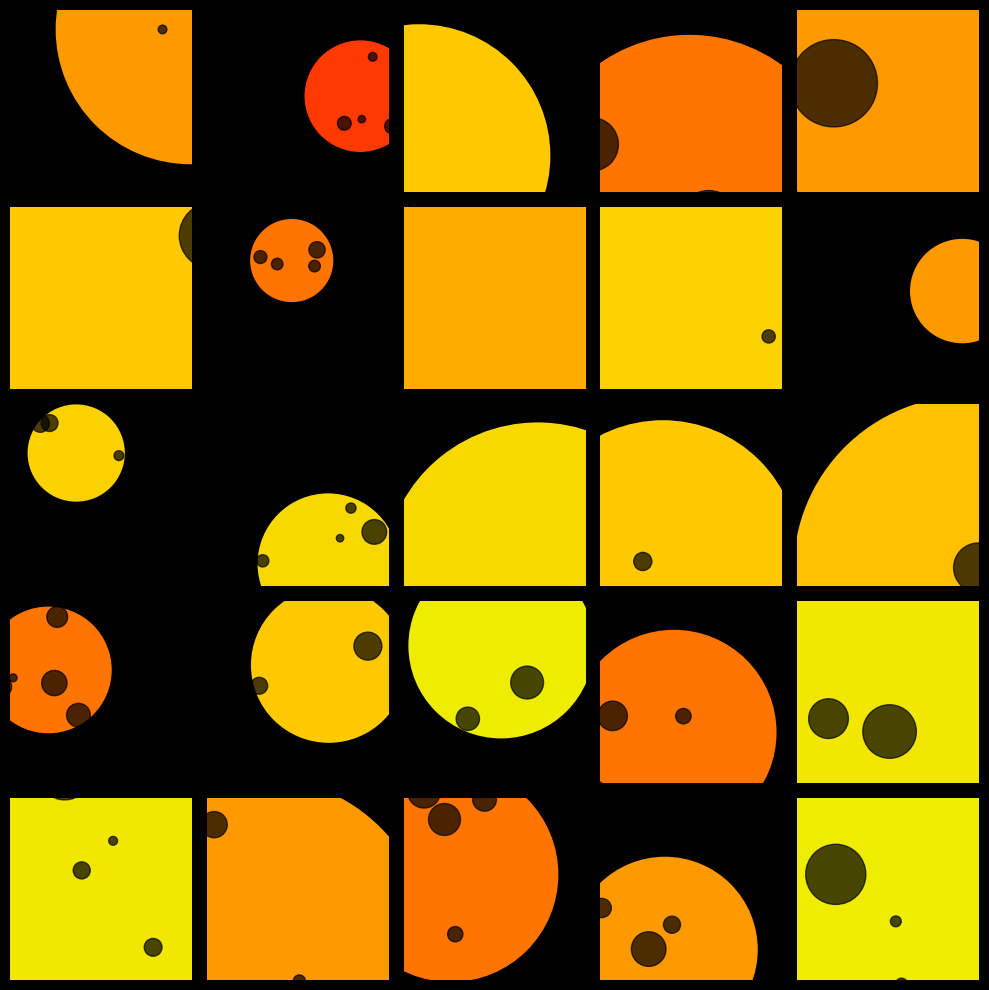

In [49]:


def generate_star(ax):
    """
    Draws a large yellow star with variable size and sunspots behind the planet.
    """
    # Randomize star size and color
    star_radius = random.uniform(0.2, 1.2)
    star_color = get_rgb_color(np.random.randint(70,85)/100, clmap)
    star_center = np.random.rand(2)
    star_circle = Circle((star_center[0], star_center[1]), star_radius, color=star_color, ec="none", lw=2)
    ax.add_artist(star_circle)

    # Add sunspots on the star
    for _ in range(random.randint(3, 7)):
        sunspot_x = random.uniform(star_center[0] - star_radius, star_center[0] + star_radius)
        sunspot_y = random.uniform(star_center[1] - star_radius, star_center[1] + star_radius)
        sunspot_size = random.uniform(0.02, star_radius * 0.2)
        
        # Only add the sunspot if it's within the star's bounds
        if np.sqrt((sunspot_x - star_center[0])**2 + (sunspot_y - star_center[1])**2) < star_radius:
            sunspot = Circle((sunspot_x, sunspot_y), sunspot_size, color="black", alpha=0.7)
            ax.add_artist(sunspot)

    ax.set_facecolor("black")
    ax.set_aspect("equal")
    ax.axis("off")



def generate_planet_grid():
    """
    Generate a 5x5 grid of planets with different atmospheres.
    """
    fig, axs = plt.subplots(5, 5, figsize=(10, 10), facecolor="black")
    atmosphere_types = ['co2', 'h2o', 'ch4']

    for i in range(5):
        for j in range(5):
            generate_star(axs[i, j])

    
    plt.tight_layout()
    plt.show()

# Generate the grid
generate_planet_grid()


In [50]:
import os

def save_star_grid():
    """
    Generate 25 planets with different atmospheres, saving each as an individual PNG
    in folders named after the atmosphere type.
    """
    
    # Ensure directories exist for each atmosphere type

    os.makedirs('stars', exist_ok=True)

    # Generate and save each planet
    for i in range(25):  # Generate a total of 25 planets
        
        # Create a new figure and axis for each planet
        fig, ax = plt.subplots(figsize=(2, 2), facecolor="black")
        generate_star(ax)
        
        # Save the figure in the corresponding folder
        filename = f"stars/star_{i+1}.png"
        plt.savefig(filename, dpi=100, bbox_inches='tight', facecolor="black")
        
        # Close the figure to free up memory
        plt.close(fig)

# Generate and save the planets
save_star_grid()

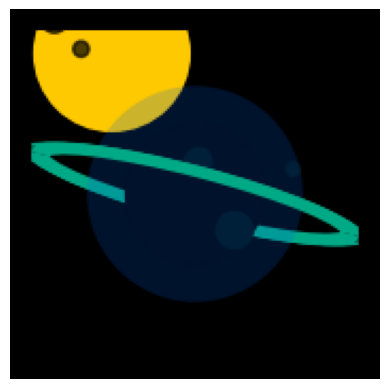

In [51]:

# Set the paths for the planet and star images
planet_folder = ['co2', 'h2o', 'ch4']
star_folder = "stars"

# Get the list of planet and star image files
planet_files = []
for folder in planet_folder:
    planet_files.extend([os.path.join(folder, f) for f in os.listdir(folder)])

star_files = os.listdir(star_folder)

# Randomly select a planet and star image
planet_file = random.choice(planet_files)
star_file = random.choice(star_files)

# Open the planet and star images
planet_image = Image.open(planet_file)
star_image = Image.open(os.path.join(star_folder, star_file))

# scale the star image to match the planet image
star_image = star_image.resize(planet_image.size)

# Overlay the star image on top of the planet image
overlay_image = Image.alpha_composite(star_image.convert("RGBA"), planet_image.convert("RGBA"))

# Plot the overlay image
plt.imshow(overlay_image)
plt.axis("off")
plt.show()


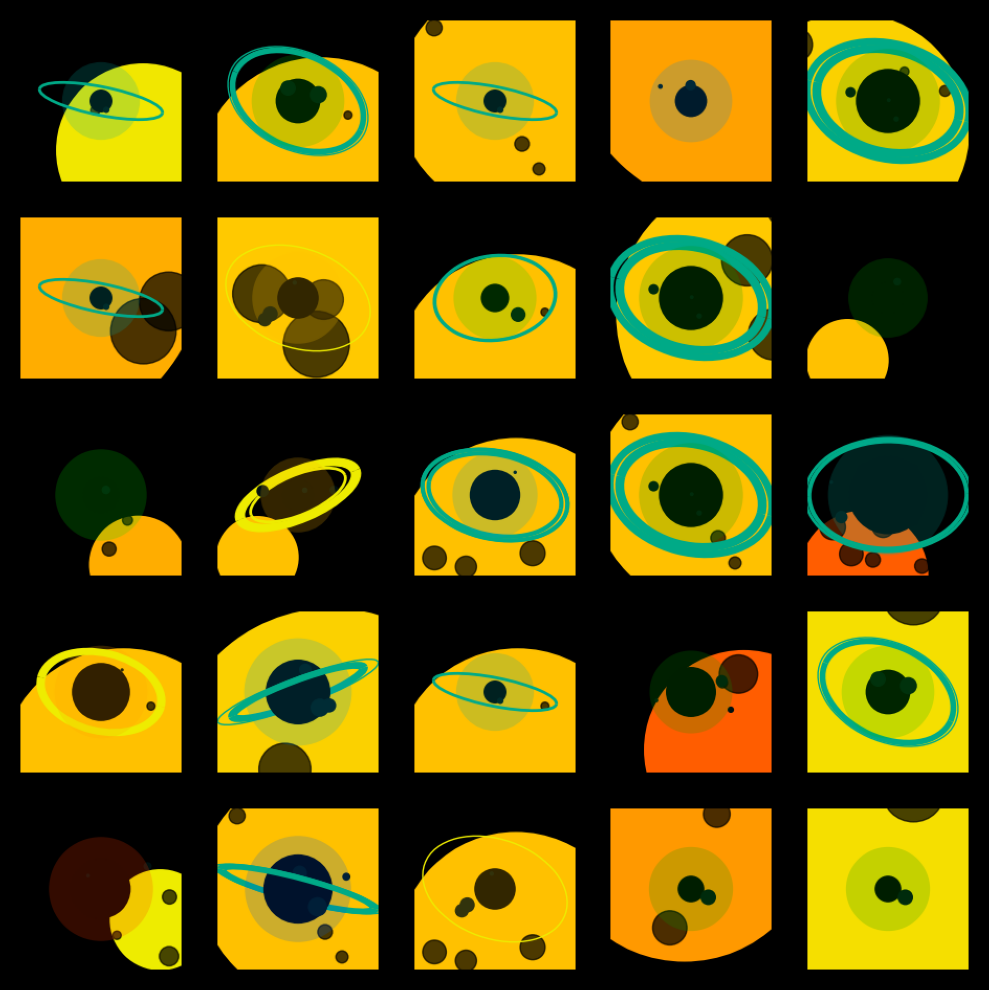

In [52]:
def generate_planet_grid():
    """
    Generate a 5x5 grid of planets with different atmospheres.
    """
    fig, axs = plt.subplots(5, 5, figsize=(10, 10), facecolor="black")
    atmosphere_types = ["H2O Vapor", "CO2 Hot", "Methane"]

    for i in range(5):
        for j in range(5):


            # Randomly select a planet and star image
            planet_file = random.choice(planet_files)
            star_file = random.choice(star_files)

            # Open the planet and star images
            planet_image = Image.open(planet_file)
            star_image = Image.open(os.path.join(star_folder, star_file))

            # scale the star image to match the planet image
            star_image = star_image.resize(planet_image.size)

            # Overlay the star image on top of the planet image
            overlay_image = Image.alpha_composite(star_image.convert("RGBA"), planet_image.convert("RGBA"))

            axs[i,j].imshow(overlay_image)
            axs[i,j].axis("off")
            

    
    plt.tight_layout()
    plt.show()

# Generate the grid
generate_planet_grid()

In [53]:
def save_combined_grid():
        """
        Generate 25 planets with different atmospheres, saving each as an individual PNG
        in folders named after the atmosphere type.
        """

        # Ensure directories exist for each atmosphere type
        dirs = ['co2', 'h2o', 'ch4']
        for d in dirs:
                os.makedirs(os.path.join('combined', d), exist_ok=True)
                os.makedirs(os.path.join('combined', d, 'train'), exist_ok=True)
                os.makedirs(os.path.join('combined', d, 'planet'), exist_ok=True)
                os.makedirs(os.path.join('combined', d, 'star'), exist_ok=True)

        for i in range(25):  # Generate a total of 25 planets for each atmosphere type
                for at in dirs:
                        # Create a new figure and axis for each planet
                        fig, ax = plt.subplots(figsize=(2, 2), facecolor="none")
                        generate_planet(ax, at)
                        # Save the figure in the corresponding folder
                        pfilename = os.path.join('combined', at,'planet', f'planet_{i+1}.png')
                        plt.savefig(pfilename, dpi=100, bbox_inches='tight', facecolor="none")
                        plt.close(fig)

                        # Create a new figure and axis for each star
                        fig, ax = plt.subplots(figsize=(2, 2), facecolor="none")
                        generate_star(ax)
                        # Save the figure in the corresponding folder
                        sfilename = os.path.join('combined', at,'star', f'star_{i+1}.png')
                        plt.savefig(sfilename, dpi=100, bbox_inches='tight', facecolor="none")
                        plt.close(fig)

                        # Open the planet and star images
                        planet_image = Image.open(pfilename)
                        star_image = Image.open(sfilename)

                        # scale the star image to match the planet image
                        star_image = star_image.resize(planet_image.size)

                        # Overlay the star image on top of the planet image
                        overlay_image = Image.alpha_composite(star_image.convert("RGBA"), planet_image.convert("RGBA"))

                        fig, ax = plt.subplots(figsize=(2, 2), facecolor="none")
                        ax.imshow(overlay_image)
                        ax.axis("off")

                        # Save the figure in the corresponding folder
                        fldr = os.path.join('combined', at,'train')
                        os.makedirs(fldr, exist_ok=True)
                        plt.savefig(os.path.join(fldr, f'{at}_{i+1}.png'), dpi=80, bbox_inches='tight', facecolor="black")
                        
                        # Close the figure to free up memory
                        plt.close(fig)

                        
                        
save_combined_grid()

https://machinelearningforkids.co.uk/#!/welcome

image shape:(139, 139, 4)


/var/folders/h9/sl36lx_j6njb48_g6phtnb580000gn/T/ipykernel_2621/1511856792.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spectrum_colormap = cm.get_cmap(clmap, 256)


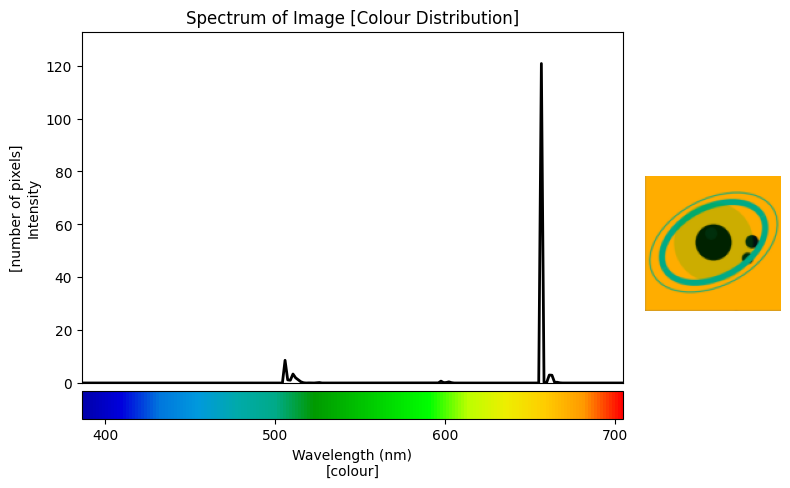

In [58]:


def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

def generate_colorbar():
    """
    Creates a color map representing the visible spectrum from red to violet.
    """
    # Use a colormap that approximates the visible light spectrum
    spectrum_colormap = cm.get_cmap(clmap, 256)
    # print('spectrum_colormap shape')
    # print(spectrum_colormap(np.linspace(0, 1, 256)).shape)
    return spectrum_colormap

def calculate_normalised_wavelength(rgb, colorbar):
    """
    Maps an RGB value to a position on a spectrum colorbar.
    Returns a 'wavelength' value between 0 and 1.
    """
    # Convert the RGB color to a normalized array [0, 1]
    rgb_normalized = np.array(rgb) / 255.0
    
    # Find the closest color on the colorbar to the RGB color
    color_diffs = np.linalg.norm(colorbar[:, :4] - rgb_normalized, axis=1)
    # print(f"colour diffs shape: {color_diffs.shape}")
    # print(f"colour diffs max: {color_diffs.max()}")
    min_index = np.argmin(color_diffs)
    # print(f"min index: {min_index}")
    
    # Normalize the index to get a value between 0 and 1
    normalized_wavelength = min_index / (len(colorbar) - 1)
    return normalized_wavelength

def generate_spectrum(image_path):
    """
    Reads in an image file, calculates normalized 'wavelengths' for each pixel, and generates a histogram.
    """
    # Load the image and convert it to an array
    image = Image.open(image_path)
    image_array = np.array(image)

    print(f'image shape:{image_array.shape}')
    
    # Flatten the 2D image array into a 1D list
    pixels = image_array.reshape(-1, 4)

    shuffled = shuffle_along_axis(pixels, axis=0).reshape(139,139,4)
    
    # Generate the colorbar for the visible spectrum
    colorbar = generate_colorbar()(np.linspace(0, 1, 256))
    
    # Calculate the 'wavelength' for each pixel 
    wavelengths = [0,1]
    for pixel in pixels:
        wavelength = calculate_normalised_wavelength(pixel, colorbar)
        wavelengths.append(wavelength)

        
    
    # Compute histogram using numpy
    hist, bin_edges = np.histogram(wavelengths, bins=256, density=True)
    
    # Prepare the x values for the line plot (midpoints of the bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Plot the histogram as a line
    fig, axs = plt.subplots(1,2,width_ratios=[4,1] , figsize=(8, 5))
    ax=axs[0]
    ax.plot(bin_centers, hist, "k-", linewidth=2)
    ax.set_title("Spectrum of Image [Colour Distribution]")
    ax.set_xticks([])
    ax.set_ylabel("[number of pixels]\nIntensity")
    ax.set_xlim(0.1, 0.9)
    ax.set_ylim(0, 1.1*hist[20:-20].max()) 

    # Create the colorbar
    norm = Normalize(vmin=0, vmax=1)
    sm = cm.ScalarMappable(cmap=clmap, norm=norm)#nipy_spectral
    sm.set_array([])  # Dummy array for color mapping
    
    
    
    # Add colorbar below the histogram
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
    cbar.set_label("Wavelength (nm)\n[colour]")
    cbar.set_ticks([0.18,0.4,0.62,0.84])
    cbar.set_ticklabels([400,500,600,700])
    cbar.ax.set_xlim(0.15,0.85)


    # axs[1].imshow(shuffled)
    # axs[1].axis('off')

    axs[1].imshow(np.array(image)[15:-15,15:-15])
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()



# Example usage
image_path = "combined/ch4/train/ch4_9.png"  # Replace with the path to your image
generate_spectrum(image_path)


image shape:(139, 139, 4)


/var/folders/h9/sl36lx_j6njb48_g6phtnb580000gn/T/ipykernel_2621/1511856792.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spectrum_colormap = cm.get_cmap(clmap, 256)


image shape:(139, 139, 4)


/var/folders/h9/sl36lx_j6njb48_g6phtnb580000gn/T/ipykernel_2621/1511856792.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spectrum_colormap = cm.get_cmap(clmap, 256)


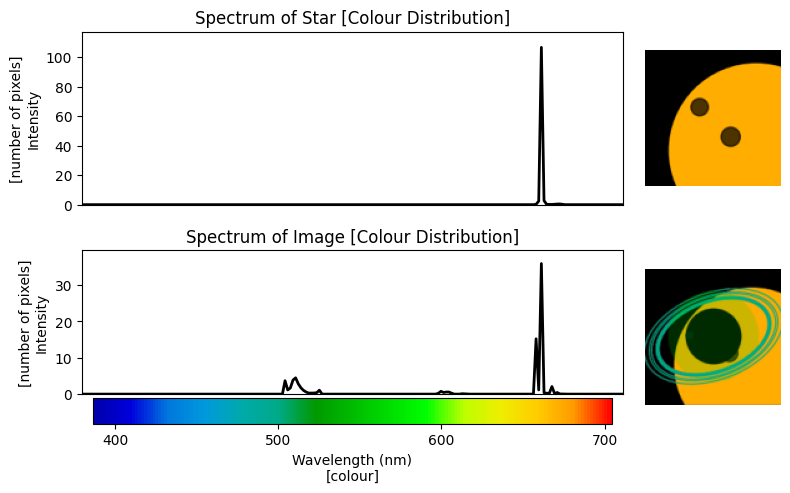

In [61]:
image_path = "combined/ch4/train/ch4_20.png"  # Replace with the path to your image
star_path = "combined/ch4/star/star_20.png"  



def generate_spectrum_w_star(image_path):
    """
    Reads in an image file, calculates normalized 'wavelengths' for each pixel, and generates a histogram.
    """

    black_bg = Image.new("RGBA", (139, 139), "black")
    

    # Load the image and convert it to an array
    image = Image.open(image_path)
    image = image.resize((139,139))


    image = Image.alpha_composite(black_bg, image)

    image_array = np.array(image)

    print(f'image shape:{image_array.shape}')
    
    # Flatten the 2D image array into a 1D list
    pixels = image_array.reshape(-1, 4)

    shuffled = shuffle_along_axis(pixels, axis=0).reshape(139,139,4)
    
    # Generate the colorbar for the visible spectrum
    colorbar = generate_colorbar()(np.linspace(0, 1, 256))
    
    # Calculate the 'wavelength' for each pixel 
    wavelengths = [0,1]
    for pixel in pixels:
        wavelength = calculate_normalised_wavelength(pixel, colorbar)
        wavelengths.append(wavelength)

        
    
    # Compute histogram using numpy
    hist, bin_edges = np.histogram(wavelengths, bins=256, density=True)
    
    # Prepare the x values for the line plot (midpoints of the bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    return hist, bin_centers, shuffled, image_array


# Example usage

hist, bin_centers, shuffled, image_array = generate_spectrum_w_star(image_path)
    
# Plot the histogram as a line
fig, axs = plt.subplots(2,2, width_ratios=[4,1] , figsize=(8, 5))
ax=axs[1,0]
ax.plot(bin_centers, hist, "k-", linewidth=2)
ax.set_title("Spectrum of Image [Colour Distribution]")
ax.set_xticks([])
ax.set_ylabel("[number of pixels]\nIntensity")
ax.set_xlim(0.1, 0.9)
ax.set_ylim(0, 1.1*hist[20:-20].max()) 

# Create the colorbar
norm = Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(cmap=clmap, norm=norm)#nipy_spectral
sm.set_array([])  # Dummy array for color mapping



# Add colorbar below the histogram
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label("Wavelength (nm)\n[colour]")
cbar.set_ticks([0.18,0.4,0.62,0.84])
cbar.set_ticklabels([400,500,600,700])
cbar.ax.set_xlim(0.15,0.85)

axs[1,1].imshow(image_array[15:-15,15:-15])
axs[1,1].axis('off')


shist, sbin_centers, shuffled, image_array = generate_spectrum_w_star(star_path)

ax=axs[0,0]
ax.plot(sbin_centers, shist, "k-", linewidth=2)
ax.set_title("Spectrum of Star [Colour Distribution]")
ax.set_xticks([])
ax.set_ylabel("[number of pixels]\nIntensity")
ax.set_xlim(0.1, 0.9)
ax.set_ylim(0, 1.1*shist[20:-20].max()) 

axs[0,1].imshow(image_array[15:-15,15:-15])
axs[0,1].axis('off')

plt.tight_layout()
plt.show()    






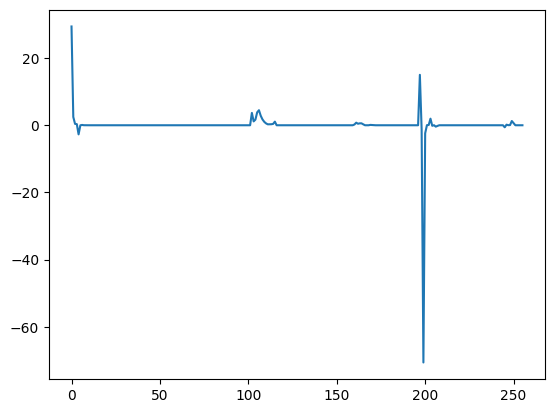

In [63]:
plt.plot(hist-shist)
ax = plt.gca()

# ax.set_ylim([-1, 8])

image shape:(139, 139, 4)


/var/folders/h9/sl36lx_j6njb48_g6phtnb580000gn/T/ipykernel_2621/1511856792.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spectrum_colormap = cm.get_cmap(clmap, 256)


image shape:(139, 139, 4)


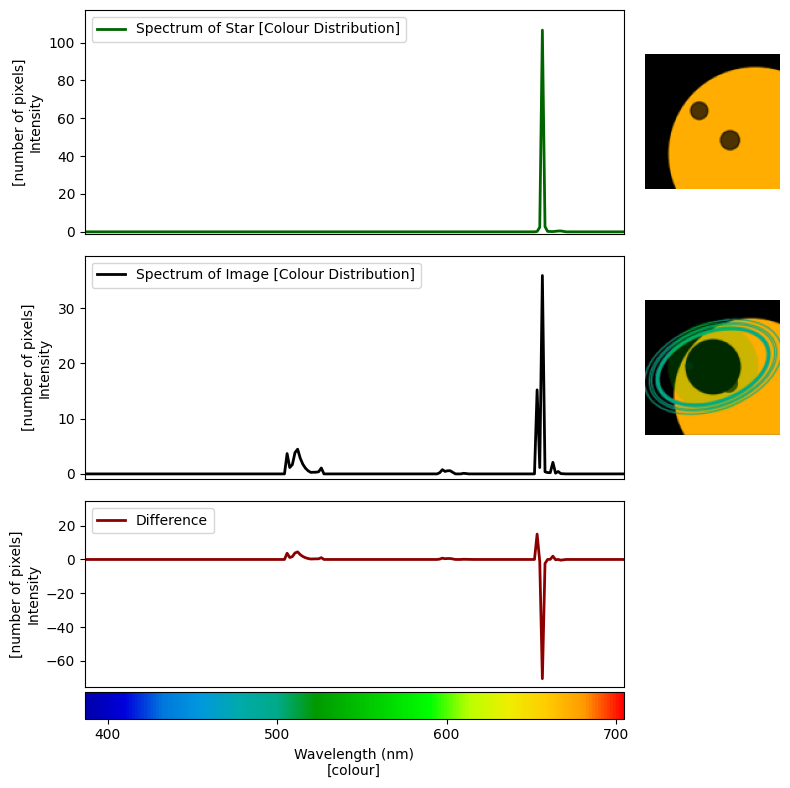

In [80]:
image_path = "combined/ch4/train/ch4_20.png"  # Replace with the path to your image
star_path = "combined/ch4/star/star_20.png"  

# Example usage

hist, bin_centers, shuffled, image_array = generate_spectrum_w_star(image_path)
    
# Plot the histogram as a line
fig, axs = plt.subplots(3,2, width_ratios=[4,1] , figsize=(8, 8))
ax=axs[1,0]
ax.plot(bin_centers, hist, "k-", linewidth=2, label='Spectrum of Image [Colour Distribution]')
# ax.set_title("Spectrum of Image [Colour Distribution]")
ax.set_xticks([])
ax.set_ylabel("[number of pixels]\nIntensity")
ax.set_xlim(0.1, 0.9)
ax.set_ylim(-1, 1.1*hist[20:-20].max()) 
ax.legend(loc='upper left')



axs[1,1].imshow(image_array[15:-15,15:-15])
axs[1,1].axis('off')


shist, sbin_centers, shuffled, image_array = generate_spectrum_w_star(star_path)

ax=axs[0,0]
ax.plot(sbin_centers, shist, "-", linewidth=2, color='darkgreen', label='Spectrum of Star [Colour Distribution]')
# ax.set_title("Spectrum of Star [Colour Distribution]")
ax.set_xticks([])
ax.set_ylabel("[number of pixels]\nIntensity")
ax.set_xlim(0.1, 0.9)
ax.set_ylim(-1, 1.1*shist[20:-20].max()) 
ax.legend(loc='upper left')

axs[0,1].imshow(image_array[15:-15,15:-15])
axs[0,1].axis('off')

ax=axs[2,0]
ax.plot(sbin_centers, hist - shist, "-", linewidth=2, label='Difference', color='darkred')
# ax.set_title("Difference")
ax.set_xticks([])
ax.set_ylabel("[number of pixels]\nIntensity")
ax.set_xlim(0.1, 0.9)
ax.legend(loc='upper left')

# Create the colorbar
norm = Normalize(vmin=0, vmax=1)
sm = cm.ScalarMappable(cmap=clmap, norm=norm)#nipy_spectral
sm.set_array([])  # Dummy array for color mapping



# Add colorbar below the histogram
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label("Wavelength (nm)\n[colour]")
cbar.set_ticks([0.18,0.4,0.62,0.84])
cbar.set_ticklabels([400,500,600,700])
cbar.ax.set_xlim(0.15,0.85)

axs[2,1].axis('off')

plt.tight_layout()
plt.show()    